In [1]:
# main.py
"""
Purpose of script:
    - Process .laz tiles into DTM .geotif images, and process these DTM .geotif images into relief or hillshade visualisations.
    - Prejudice towards using pdal for .laz -> DTM processing and Relief Visualization Toolbox (`rvt_py`) for DTM -> visualizations.
Current status:
    - In development (fragile)
"""

# import top-level packages
import os
import sys
import json
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rasterio

import earthaccess
import pdal
import rvt

# compute absolute path to the project root's src/
sys.path.insert(0, os.path.join(os.getcwd(), "src"))

# import project specific (src/project_utils/...) packages #
from project_utils import config as proj_config
from project_utils import io as proj_io
from project_utils import geo as proj_geo
from project_utils import lidar as proj_lidar
from project_utils import raster as proj_raster
from project_utils import satellite as proj_satellite
from project_utils import vis as proj_vis
from project_utils import scratch as proj_scratch

# auto-reload any module that changes on disk
%load_ext autoreload
%autoreload
%reload_ext autoreload

In [2]:
def test_setup(path_to_config):
    proj_scratch.test_imports()


path_to_config = "main/config.yml"

# test setup
test_setup(path_to_config)

# get config from config.yml
config = proj_config.Config(path_to_config)

proj_io.authenticate_earthaccess()


All core imports succeeded!
Library         | Version   
----------------------------
rasterio        | 1.4.3     
pdal            | 3.4.5     
 
[io] Authenticating with earthaccess...
[io] Authenticated: True


True

In [11]:
# download dataset metadata and csv
concept_id = config.get("dataset", "concept_id")
# doi = config.get("dataset", "doi")
path_to_csv_dir = config.get("paths", "dataset_csv")

# metadata = earthaccess.search_datasets(doi=doi)[0]

path_to_csv = proj_io.download_earthaccess_dataset_csv(
    concept_id,
    path_to_csv_dir,
    overwrite=False
)

index = 28
df = pd.read_csv(path_to_csv)

laz_filename = df.iloc[index]["filename"]

# path_to_laz = proj_io.fetch_laz_file(
#     laz_filename,
#     config.get("paths", "raw", "laz"),
#     verbose=False,
#     overwrite=False
# )

[io] Downloading dataset CSV for concept_id: C2398128915-ORNL_CLOUD


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

[io] CSV downloaded: data/metadata/cms_brazil_lidar_tile_inventory.csv


In [12]:
img = proj_satellite.fetch_esri_from_row(
    df,
    laz_filename,
    save_path=os.path.join(
        config.get("paths", "raw", "sat"),
        laz_filename
    )
)

[satellite] Downloading ESRI image for AND_A01_2013_laz_11.laz...
[satellite] Saved: data/raw/tiles/sat/AND_A01_2013_laz_11.laz


In [ ]:
# title = f"ESRI Satellite image of\n{laz_filename}"
title = """
line one
line two
"""

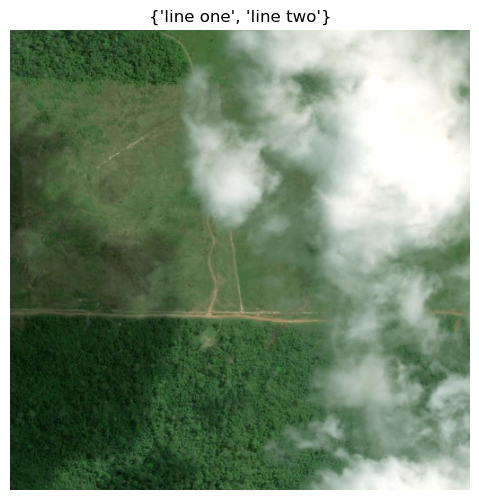

In [24]:
plt.imshow(img)
plt.title(title)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()  # Required to actually display the image in a .py script
